Sample Test: Recording a short video and reading the frames

This sample test demonstrates basic live camera validation using OpenCV and V4L2. It records a 3-second video stream from the Raspberry Pi NoIR camera, saves it as an MP4 file, and then reopens the video to read and display each frame. This confirms that live capture, video encoding, and frame extraction are all working correctly.

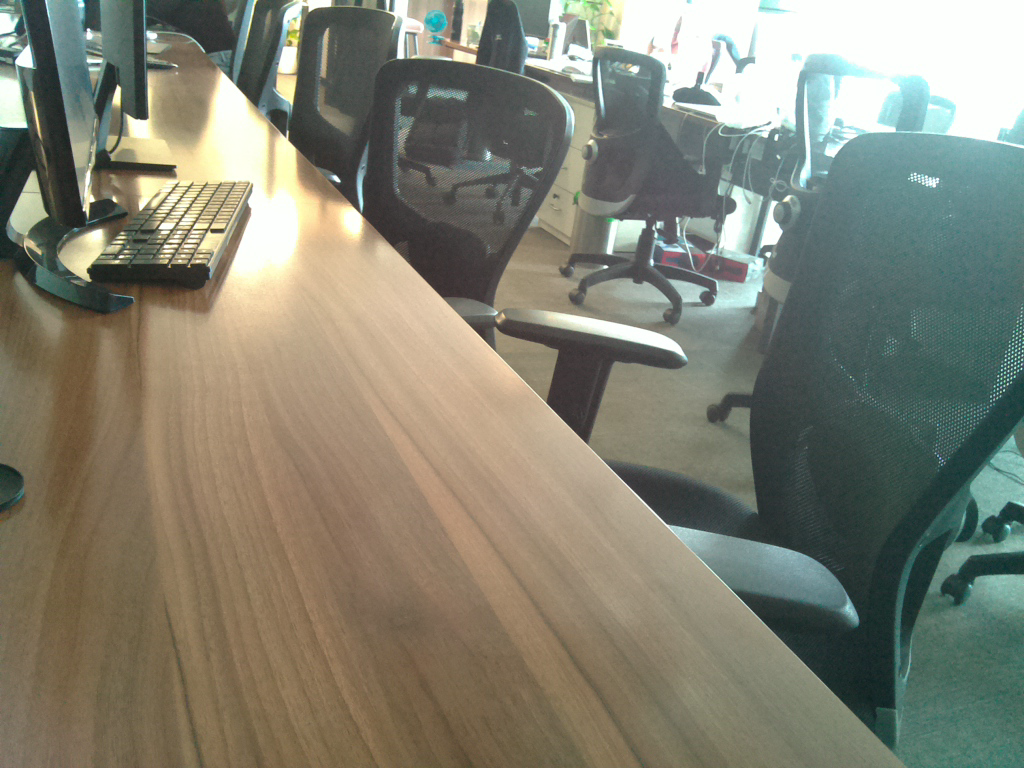

Video saved as test_video.mp4
Extracted and displayed 0th frame from test_video.mp4


In [1]:
import cv2
from IPython.display import display, clear_output
from PIL import Image

# Parameters
video_filename = "test_video.mp4"
duration_secs = 3
fps = 30
width, height = 640, 480

# Open the camera
cap = cv2.VideoCapture("/dev/video0")
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
cap.set(cv2.CAP_PROP_FPS, fps)

if not cap.isOpened():
    print("Error: Could not open camera.")
else:
    # Define VideoWriter to save video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_filename, fourcc, fps, (width, height))

    # Calculate total frames
    total_frames = duration_secs * fps
    frame_count = 0

    print("Recording 3-second video...")
    while frame_count < total_frames:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Write frame to video
        out.write(frame)

        # Optional: display frame in notebook
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)
        clear_output(wait=True)
        display(img)

        frame_count += 1

    cap.release()
    out.release()
    print(f"Video saved as {video_filename}")

# Reading frames from the recorded video
cap = cv2.VideoCapture(video_filename)
frame_number = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to RGB for notebook display
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame_rgb)
    clear_output(wait=True)
    display(img)

    frame_number += 1

cap.release()
print(f"Extracted and displayed {frame_number}th frame from {video_filename}")
